## Import all required libraries


In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Flatten
from sklearn.model_selection import train_test_split
from tensorflow import keras


## Load Train and Test data

In [149]:
fashion_mnist = keras.datasets.fashion_mnist
(train_full_X, train_full_y), (test_X, test_y) = fashion_mnist.load_data()

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Designing Fully Connected Neural Network Architecture

In [150]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [151]:
from keras.models import  Sequential
from keras.layers.core import  Dense, Flatten

model = Sequential([  
    Flatten(input_shape=(28,28)),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
    ])


Compile network

In [152]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

Split the data

In [153]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_full_X, train_full_y, test_size=0.10, random_state=42)


Run the model

In [154]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],verbose=1)

Epoch 1/200
106/106 [==============================] - 1s 9ms/step - loss: 38.4767 - accuracy: 0.5743 - val_loss: 1.2302 - val_accuracy: 0.6722
Epoch 2/200
106/106 [==============================] - 1s 6ms/step - loss: 1.0590 - accuracy: 0.6918 - val_loss: 0.9590 - val_accuracy: 0.7082
Epoch 3/200
106/106 [==============================] - 1s 6ms/step - loss: 0.8749 - accuracy: 0.7289 - val_loss: 0.8384 - val_accuracy: 0.7327
Epoch 4/200
106/106 [==============================] - 1s 6ms/step - loss: 0.7850 - accuracy: 0.7490 - val_loss: 0.7917 - val_accuracy: 0.7445
Epoch 5/200
106/106 [==============================] - 1s 6ms/step - loss: 0.7275 - accuracy: 0.7625 - val_loss: 0.7333 - val_accuracy: 0.7677
Epoch 6/200
106/106 [==============================] - 1s 6ms/step - loss: 0.6846 - accuracy: 0.7725 - val_loss: 0.7187 - val_accuracy: 0.7698
Epoch 7/200
106/106 [==============================] - 1s 6ms/step - loss: 0.6524 - accuracy: 0.7820 - val_loss: 0.6826 - val_accuracy: 0.779

<AxesSubplot:title={'center':'Accuracy'}>

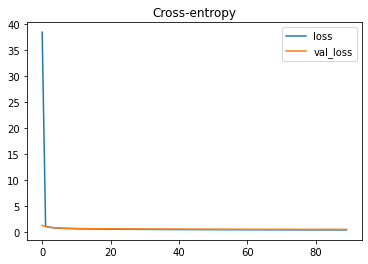

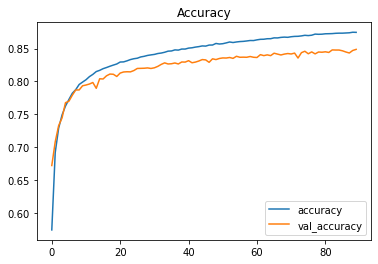

In [155]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [156]:
model.evaluate(test_X, test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.8415


[0.48121747374534607, 0.8414999842643738]